In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import cv2
import os

In [253]:
STANDARD_RESIZE_VALUE = 200
classifier_classes = {'no_tumor': 0, 'glioma_tumor': 1, 'pituitary_tumor': 1, 'meningioma_tumor': 1}

In [254]:
X = []
Y = []

for cls_class in classifier_classes:
    path = 'data/Training/' + cls_class
    for file in os.listdir(path):
        img = cv2.imread(path + '/' + file, 0)
        img = cv2.resize(img, (STANDARD_RESIZE_VALUE, STANDARD_RESIZE_VALUE))
        X.append(img)
        Y.append(classifier_classes[cls_class])

In [255]:
X = np.array(X)
Y = np.array(Y)
X.shape

(2870, 200, 200)

In [256]:
# Sklearn accepts only bidiomensional data, so we have to convert it

X_reshape = X.reshape(len(X), -1)
X_reshape.shape

(2870, 40000)

In [257]:
xTrain, xTest, yTrain, yTest = train_test_split(X_reshape, Y, random_state=10, test_size=.2)

In [258]:
xTrain.shape, xTest.shape

((2296, 40000), (574, 40000))

In [259]:
# Scalling data

xTrain = xTrain / 255
xTest = xTest / 255

In [260]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [261]:
classifier = LogisticRegression(C=0.1)
classifier.fit(xTrain, yTrain)

LogisticRegression(C=0.1)

In [262]:
classifier.score(xTest, yTest)

0.9285714285714286

In [270]:
values_classifier = {0: 'No Tumor', 1: 'Positive Tumor'}

In [273]:
def test_based_on_images(fileTestingClass):
    plt.figure(figsize=(12, 8))
    path = os.listdir('Data/Testing/')
    
    subplot_index = 1
    
    for i in os.listdir('Data/Testing/' + fileTestingClass)[:9]:
        plt.subplot(3, 3, subplot_index)

        img = cv2.imread('Data/Testing/' + fileTestingClass + i, 0)
        img_resized = cv2.resize(img, (STANDARD_RESIZE_VALUE, STANDARD_RESIZE_VALUE))
        img_resized = img_resized.reshape(1, -1) / 255
        path = classifier.predict(img_resized)
        plt.title(values_classifier[path[0]])
        plt.imshow(img, cmap = 'gray')
        plt.axis('off')
        subplot_index += 1

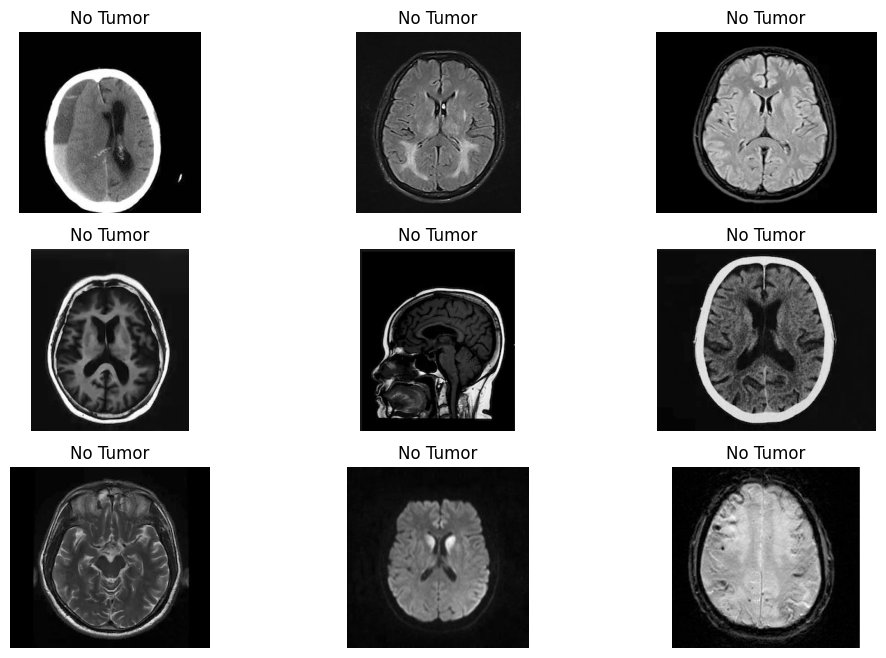

In [274]:
test_based_on_images('no_tumor/')

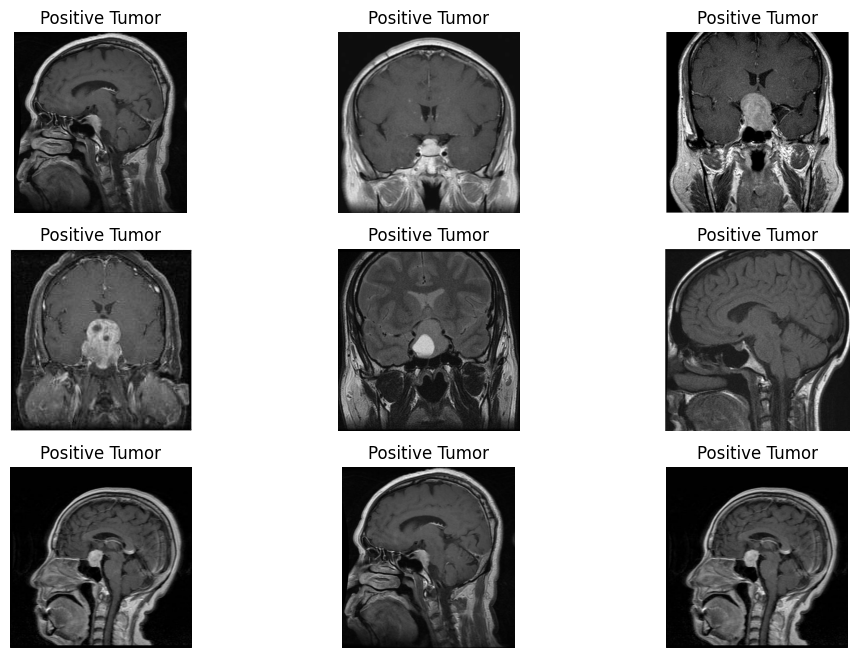

In [275]:
test_based_on_images('pituitary_tumor/')

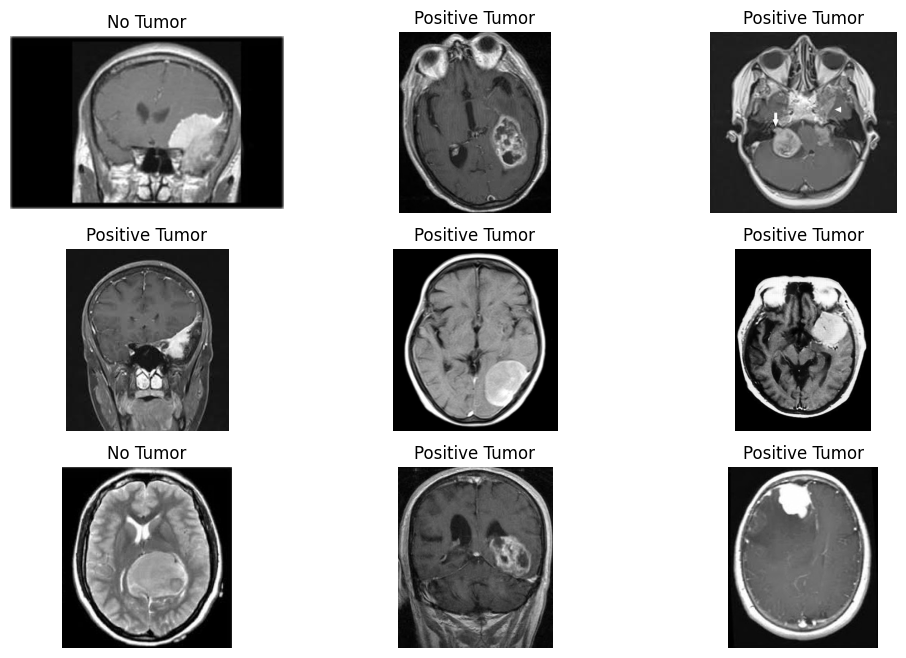

In [276]:
test_based_on_images('meningioma_tumor/')

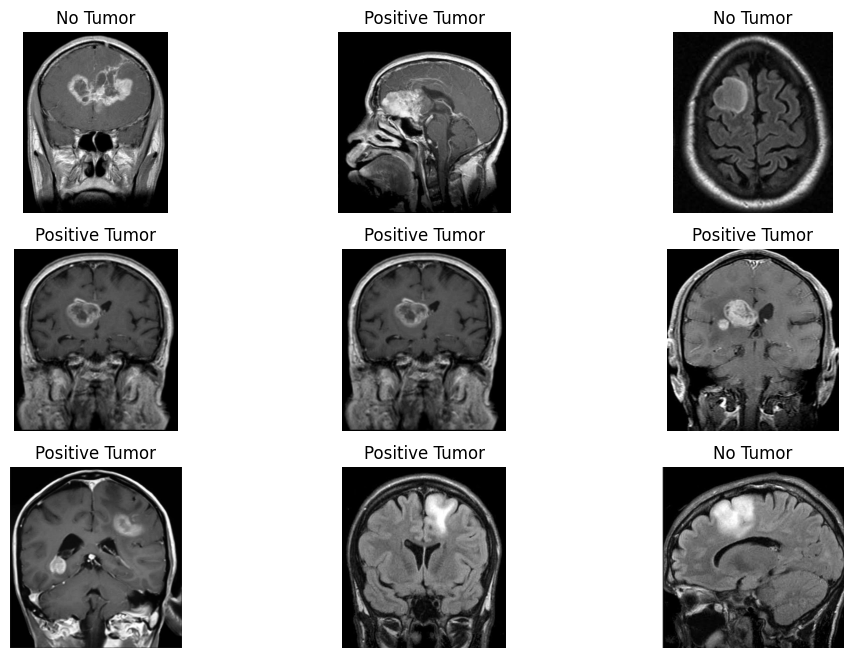

In [277]:
test_based_on_images('glioma_tumor/')